In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
data = 'Data/cleaned_data_eda.csv'

In [3]:
df = pd.read_csv(data)

# Table of Contents

1. [Cleaning Data](#Cleaning_Data)
2. [Feature Engineering](#Feature_Engineering)
3. [Data Visualizations](#EDA)
4. [Model Building](#Model_Building) <br>
    4.1 [Linear Regression](#Linear_Regression) <br>
    4.2 [KNN Regressor](#KNN_Regressor) <br>
    4.3 [PCA](#PCA) <br>
    4.4 [Stepwise Linear Regression](#Step_Wise) <br>
    4.5 [Ridge Regression](#Ridge) <br>
    4.6 [Lasso Regression](#Lasso) <br>
    4.7 [Adding Synth Model Type As Dummy Variable](#synth_model_type) <br>
    4.7.1 [New Linear Model](#linear_model_w_model) <br>
    4.7.2 [New KNN Model](#knn_model_w_model) <br>
    4.7.3 [New PCA Model](#PCA_Full) <br>
    4.7.4 [Full Ridge Regression](#full_ridge) <br>

I am curious if I can build a model to accurately predict price based on input features.

I also am curious to see if I can build a model to accurately predict synth_type based on input features.

## 1. Cleaning the Data to build a Model
<a id = 'Cleaning_Data'></a>

In [4]:
df.head()

,Unnamed: 0,Brand,Condition,Description,Model,synth_types,Price,year_made,made_in,n_keys,urls
0,0,Roland,Excellent,a previous owner added some custom knobs - see...,Boutique Series SE-02 Analog Synthesizer,Analog Synths,285.0,2010s,NaN,0,https://reverb.com/item/33250949-roland-boutiq...
1,1,Moog,Very Good,Unit is in great condition. A couple of blemis...,Sub 37 Tribute Edition,Analog Synths,975.0,2010s,United States,37 Keys,https://reverb.com/item/33250934-moog-sub-37-t...
2,2,4MS,Mint,4MS POD 48X (Powered Case) plus POWER BRICK Th...,Pod 48x Powered,Eurorack,155.0,2010s,NaN,0,https://reverb.com/item/33250878-4ms-pod-48x-p...
3,3,Dreadbox,Mint,Dreadbox Hades Bass Synthesizer Outstanding s...,Hades Bass Synthesizer,Analog Synths,560.0,2010s,Greece,0,https://reverb.com/item/33250796-dreadbox-hade...
4,4,M-Audio,Very Good,Getting rid of some things because times are t...,Axiom 49 Key USB MIDI Keyboard Controller,Controllers,55.0,2010s,NaN,49 Keys,https://reverb.com/item/33248413-m-audio-axiom...


In [5]:
# Checking for null values

df.isnull().sum()

Unnamed: 0        0
Brand             0
Condition         0
Description       0
Model             0
synth_types      84
Price             0
year_made      1534
made_in        2387
n_keys            0
urls            522
dtype: int64

In [6]:
# Checking to see the percentage of null values out of the entire dataset

100 * df.isnull().sum() / len(df)

Unnamed: 0      0.000000
Brand           0.000000
Condition       0.000000
Description     0.000000
Model           0.000000
synth_types     2.338530
Price           0.000000
year_made      42.706013
made_in        66.453229
n_keys          0.000000
urls           14.532294
dtype: float64

The missing amount for year_made is 43%, and the missing amount for made_in is 66%. Since these are such large portions of the dataset and the only way to find that data would be to search for it, and since I don't have accurate reads on the year_made feature - since they're listed as decades I'm going to remove both columns from the dataset

In [7]:
df.drop(['Unnamed: 0', 'year_made', 'made_in'], axis=1, inplace=True)

In [8]:
# The url column also isn't relevant to any model, so I will remove it.

df.drop('urls', axis=1, inplace=True)

In [9]:
# Looking at the synth_types that are null

print(len(df[df['synth_types'].isnull()]))

df[df['synth_types'].isnull()]

84


,Brand,Condition,Description,Model,synth_types,Price,n_keys
29,Korg,Mint,This Arp Odyssey sounds great and has been pla...,ARP Odyssey Rev3 37-Slim Key Duophonic Analog ...,NaN,500.00,37 Keys
108,companyofquail,Very Good,Stand to hold two of the classic elektron devi...,EIT-1 Two Tier Elektron Stand,NaN,150.00,0
133,Nord,Excellent,"Nord Electro 6D 61-Key •Perfect Condition, bar...",Electro 6D 61-Key Semi Weighted Keyboard,NaN,1500.00,0
141,Novation,Mint,Great condition. All knobs work perfectly. No ...,K station,NaN,170.00,0
217,Philips,Excellent,Philips wanted to make something different so ...,PMC-100 Composer,NaN,147.00,0
...,...,...,...,...,...,...,...
3274,Yamaha,Good,"Yeah, you're seeing that right on the back pan...",QX1,NaN,100.00,0
3292,DIY,Brand New,Shipping Worldwide. This is a fresh built Shr...,"Shruthi-1, Digital/FX: The Nerd",NaN,275.00,0
3296,DIY,Brand New,Shipping Worldwide. This is a fresh built Shr...,"Shruthi-1, LP2+Delay: The Psychonaut",NaN,275.00,0
3343,Eico,Non Functioning,THIS IS A GREAT OLD UNIT FOR THE REPAIRMAN or ...,320,NaN,22.99,0


In [10]:
re.findall('Nord', df['Description'][133])

['Nord', 'Nord', 'Nord']

In [11]:
# Building a function to try to pull synth types from the description

def synth_type_identifier(row):
    for synth_type in df.synth_types.unique():
        if re.search(str(synth_type).lower(), str(row).lower()):
            return synth_type
        else:
            pass

In [12]:
df['synth_types'].fillna(df['Description'].apply(synth_type_identifier), inplace=True)

In [13]:
df.synth_types.isnull().sum()

78

In [14]:
# I will remove all remaining null values for synth type

df.dropna(subset=['synth_types'], axis=0, inplace=True)

In [15]:
df.isnull().sum()

Brand          0
Condition      0
Description    0
Model          0
synth_types    0
Price          0
n_keys         0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3514 entries, 0 to 3591
Data columns (total 7 columns):
Brand          3514 non-null object
Condition      3514 non-null object
Description    3514 non-null object
Model          3514 non-null object
synth_types    3514 non-null object
Price          3514 non-null float64
n_keys         3514 non-null object
dtypes: float64(1), object(6)
memory usage: 219.6+ KB


## 2. Feature Engineering
<a id= 'Feature_Engineering'></a>

In [17]:
# Converting Brand to dummy variables

#df = pd.get_dummies(df, columns=['Brand'], drop_first=True)

In [18]:
# Converting Condition and synth_types to dummy variables

df = pd.get_dummies(df, columns=['Condition', 'synth_types'], drop_first=True)

In [19]:
# Converting n_keys to numeric
df['n_keys'] = df.n_keys.apply(lambda x: pd.to_numeric(x.split()[0]))

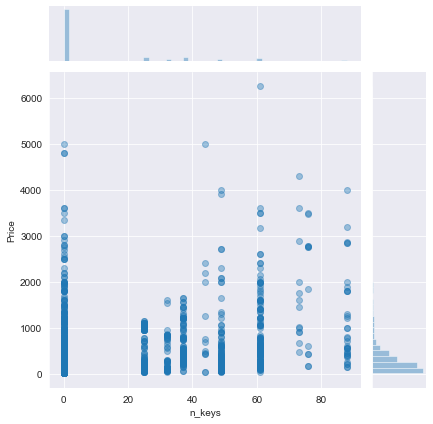

In [20]:
# Looking to see if there's any correlation between number of keys and price

sns.jointplot(x='n_keys', y='Price', data=df, alpha=0.4)

In [21]:
# Reviewing n_keys further to see if it has any significance in relation to price
import statsmodels.api as sm

X = df['n_keys']
y = df['Price']

ols_model = sm.OLS(y, sm.add_constant(X))
ols_results = ols_model.fit()

ols_results.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     530.1
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          2.26e-109
Time:                        17:42:26   Log-Likelihood:                -26511.
No. Observations:                3514   AIC:                         5.303e+04
Df Residuals:                    3512   BIC:                         5.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.8569      8.596     31.161      0.000     251.003     284.711
n_keys         9.0595      0.393     23.025      0.000       8.288       9.831
==============================================================================
Omnibus:                     3131.595   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124386.163
Skew:                           4.170   Prob(JB):                         0.00
Kurtosis:                      30.928   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Creating a new dataframe to drop Description 
new_df = df.drop(['Description', 'Model', 'Brand'], axis=1)

## 3. Data Visualizations
<a id='EDA'></a>

### Correlation Matrix

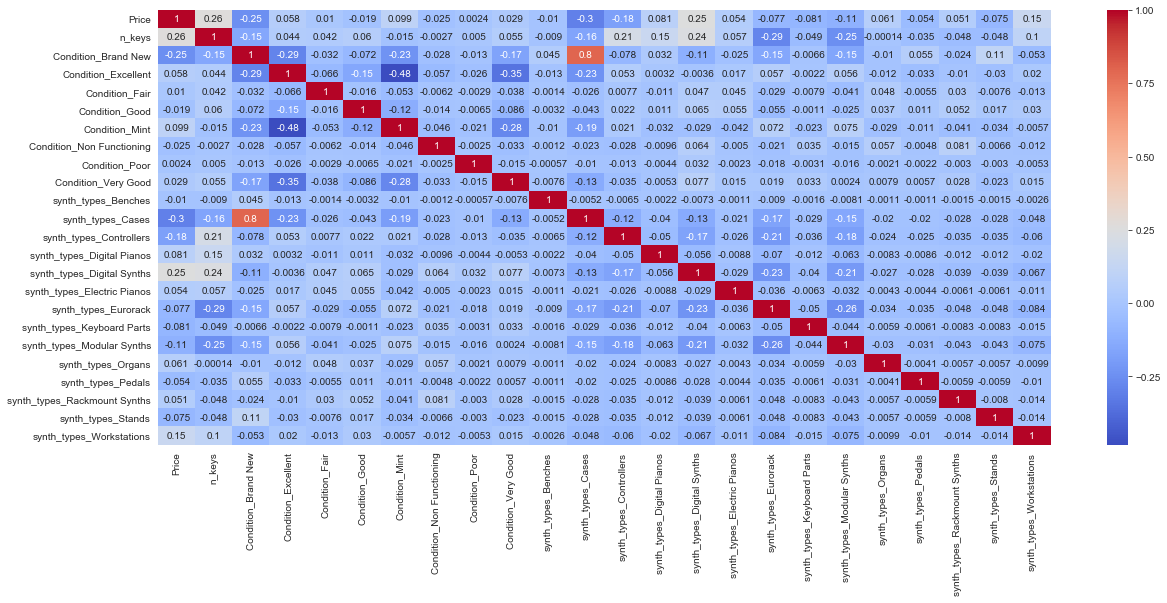

In [23]:
plt.figure(figsize=(20, 8))

sns.heatmap(new_df.corr(method='spearman'), annot=True, cmap='coolwarm')

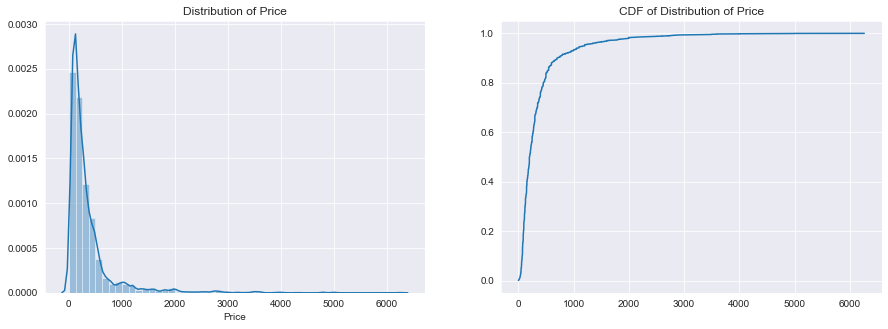

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(df['Price'])
plt.title('Distribution of Price')

plt.subplot(122)
price = np.array(df['Price'])
price = np.sort(price)
price_y = np.arange(1, len(price)+1) / len(price)

plt.plot(price, price_y)
plt.title('CDF of Distribution of Price')

plt.show()

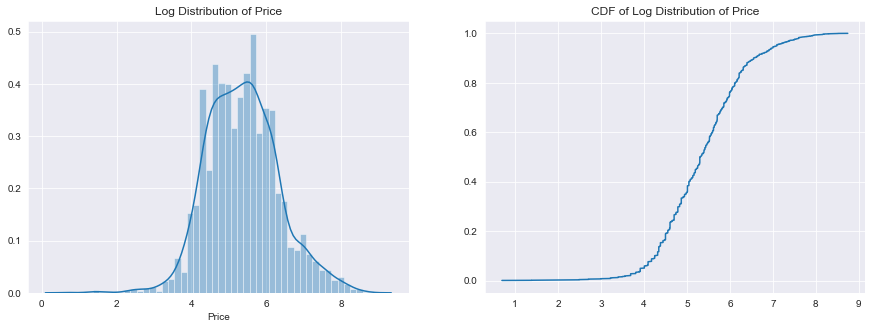

In [25]:
# Looking at the Log Distribution of Price
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.distplot(np.log(df['Price']))
plt.title('Log Distribution of Price')

plt.subplot(122)
price = np.array(np.log(df['Price']))
price = np.sort(price)
price_y = np.arange(1, len(price)+1) / len(price)

plt.plot(price, price_y)
plt.title('CDF of Log Distribution of Price')

plt.show()

From the visualizations above I can conclude that Price is log-normally distributed, as the log of Price is a normal distribution.

# 4. Model Building
<a id='Model_Building'></a>

## 4.1 Linear Regression
<a id='Linear_Regression'></a>

In [26]:
# Importing linear regression from sci-kit learn

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [27]:
# Creating features and labels variables, and splitting them into training and testing datasets

X = new_df.drop('Price', axis=1)
y = new_df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fitting the model

linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Using Statsmodels to fit the model and look at p-values

import statsmodels.api as sm

sm_model = sm.OLS(y, sm.add_constant(X))
sm_results = sm_model.fit()

sm_results.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     50.15
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          1.68e-196
Time:                        17:42:33   Log-Likelihood:                -26256.
No. Observations:                3514   AIC:                         5.256e+04
Df Residuals:                    3490   BIC:                         5.271e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          794.5569    120.623      6.587      0.000     558.057    1031.056
n_keys                           6.8779      0.440     15.648      0.000       6.016       7.740
Condition_Brand New            -79.2065    124.685     -0.635      0.525    -323.669     165.256
Condition_Excellent           -247.1698    119.831     -2.063      0.039    -482.116     -12.223
Condition_Fair                -384.7609    146.592     -2.625      0.009    -672.175     -97.346
Condition_Good                -363.8798    125.012     -2.911      0.004    -608.985    -118.775
Condition_Mint                -228.8501    120.110     -1.905      0.057    -464.344       6.644
Condition_Non Functioning     -218.2344    154.227     -1.415      0.157    -520.619      84.151
Condition_Poor                -507.8218    244.705     -2.075      0.038    -987.602     -28.042
Condition_Very Good           -302.2658    120.539     -2.508      0.012    -538.599     -65.932
synth_types_Benches           -585.3604    428.967     -1.365      0.172   -1426.411     255.690
synth_types_Cases             -605.2151     48.376    -12.511      0.000    -700.062    -510.368
synth_types_Controllers       -483.8553     27.925    -17.327      0.000    -538.606    -429.105
synth_types_Digital Pianos     -78.1186     60.398     -1.293      0.196    -196.538      40.300
synth_types_Digital Synths    -119.2271     26.678     -4.469      0.000    -171.534     -66.920
synth_types_Electric Pianos    534.4818    108.984      4.904      0.000     320.803     748.161
synth_types_Eurorack          -311.8498     26.014    -11.988      0.000    -362.853    -260.846
synth_types_Keyboard Parts    -425.7641     80.896     -5.263      0.000    -584.372    -267.156
synth_types_Modular Synths    -302.9807     26.873    -11.274      0.000    -355.670    -250.291
synth_types_Organs             181.2122    116.539      1.555      0.120     -47.278     409.703
synth_types_Pedals            -429.9758    113.130     -3.801      0.000    -651.784    -208.167
synth_types_Rackmount Synths    -6.4380     83.988     -0.077      0.939    -171.109     158.233
synth_types_Stands            -511.4930     85.626     -5.974      0.000    -679.376    -343.610
synth_types_Workstations      -103.1728     50.759     -2.033      0.042    -202.693      -3.653
==============================================================================
Omnibus:                     3152.662   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142040.660
Skew:                           4.161   Prob(JB):                         0.00
Kurtosis:                      33.014   Cond. No.                     1.30e+03
=====================================================================

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
basic_linear_y_pred = linear_model.predict(X_test)

basic_linear_mae = mean_absolute_error(y_test, basic_linear_y_pred)
print('Mean Absolute Error: {}'.format(basic_linear_mae))
basic_linear_mse = mean_squared_error(y_test, basic_linear_y_pred)
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, basic_linear_y_pred)))
basic_linear_rmse = np.sqrt(mean_squared_error(y_test, basic_linear_y_pred))
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test, basic_linear_y_pred))))

Mean Absolute Error: 231.68143801189157
Mean Squared Error: 176177.37339058533
Root Mean Squared Error: 419.73488464813755


In [31]:
results = pd.DataFrame({'y_true': y_test,
                       'y_pred': basic_linear_y_pred})
results.head(10)

,y_true,y_pred
2471,195.00,88.346563
218,168.00,428.830773
2543,129.99,212.609041
2659,129.99,111.637441
593,65.00,230.493688
2838,76.99,111.637441
3007,55.00,267.254586
1586,65.00,230.493688
2597,672.81,852.277247
656,235.00,267.254586


In [32]:
# Calculating R-Squared for the Sci-kit Learn Linear Model
basic_linear_r_squared = linear_model.score(X_test, y_test)
print('R-Squared: {}'.format(basic_linear_r_squared))

# Calculating Adjusted R-Squared for the Sci-kit Learn Linear Model
basic_linear_adj_r_squared = 1 - ((1-basic_linear_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: {}'.format(basic_linear_adj_r_squared))

R-Squared: 0.18014345397199172
Adjusted R-Squared: 0.17450547199357558


In [33]:
# Building a DataFrame to compare attributes of different Models
comparison_df = pd.DataFrame()

comparison_df = comparison_df.append([['Basic Linear', basic_linear_mae, basic_linear_mse, 
                                      basic_linear_rmse, basic_linear_r_squared, basic_linear_adj_r_squared]])

It looks like the model is way off here. I think this might be due to the value for n_keys not being scaled properly. Since there are a total of 10 different n_keys types, and to keep it consistent with the other features, I will make dummy values for the n_keys.

In [34]:
new_df.head()

,Price,n_keys,Condition_Brand New,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Mint,Condition_Non Functioning,Condition_Poor,Condition_Very Good,...,synth_types_Digital Synths,synth_types_Electric Pianos,synth_types_Eurorack,synth_types_Keyboard Parts,synth_types_Modular Synths,synth_types_Organs,synth_types_Pedals,synth_types_Rackmount Synths,synth_types_Stands,synth_types_Workstations
0,285.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,975.0,37,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,155.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,560.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55.0,49,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
new_df = pd.get_dummies(new_df, columns=['n_keys'], drop_first=True)

In [36]:
X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
linear_model.fit(X_train, y_train)

updated_basic_linear_r_squared = linear_model.score(X_test, y_test)
print('R-Squared: {}'.format(updated_basic_linear_r_squared))

updated_basic_linear_adj_r_squared = 1 - ((1-updated_basic_linear_r_squared) * 
                                          len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: {}'.format(updated_basic_linear_adj_r_squared))

R-Squared: 0.22180864791229737
Adjusted R-Squared: 0.21465697552091123


In [38]:
updated_basic_linear_y_pred = linear_model.predict(X_test)

updated_basic_linear_mae = mean_absolute_error(y_test, updated_basic_linear_y_pred)
print('Mean Absolute Error: {}'.format(updated_basic_linear_mae))

updated_basic_linear_mse = mean_squared_error(y_test, updated_basic_linear_y_pred)
print('Mean Square Error: {}'.format(updated_basic_linear_mse))

updated_basic_linear_rmse = np.sqrt(mean_squared_error(y_test, updated_basic_linear_y_pred))
print('Root Mean Square Error: {}'.format(updated_basic_linear_rmse))

Mean Absolute Error: 221.46974875778642
Mean Square Error: 167224.02116601015
Root Mean Square Error: 408.9303377911819


In [39]:
results = pd.DataFrame({'y_true': y_test,
                       'y_pred': updated_basic_linear_y_pred})
results.head(10)

,y_true,y_pred
2471,195.00,161.600943
218,168.00,457.813690
2543,129.99,205.624015
2659,129.99,111.246595
593,65.00,232.618251
2838,76.99,111.246595
3007,55.00,267.231296
1586,65.00,232.618251
2597,672.81,869.049673
656,235.00,267.231296


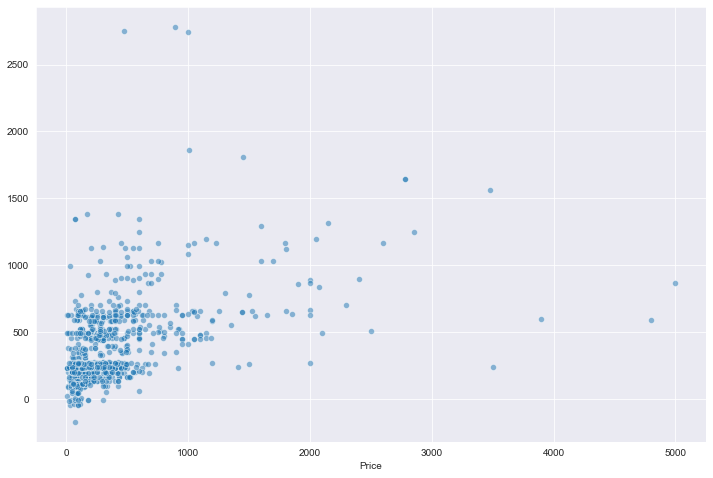

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=updated_basic_linear_y_pred, alpha=0.5)

In [41]:
# Building a stats model model to review the summary table

sm_model = sm.OLS(y, sm.add_constant(X))
sm_results = sm_model.fit()
sm_results.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     47.22
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          3.03e-238
Time:                        17:42:34   Log-Likelihood:                -26141.
No. Observations:                3514   AIC:                         5.235e+04
Df Residuals:                    3482   BIC:                         5.254e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          790.5331    117.219      6.744      0.000     560.707    1020.359
Condition_Brand New             -4.8513    121.308     -0.040      0.968    -242.694     232.991
Condition_Excellent           -161.8900    116.621     -1.388      0.165    -390.543      66.763
Condition_Fair                -378.3488    142.166     -2.661      0.008    -657.086     -99.612
Condition_Good                -296.9280    121.817     -2.437      0.015    -535.768     -58.088
Condition_Mint                -143.9112    116.889     -1.231      0.218    -373.089      85.267
Condition_Non Functioning     -161.2511    149.877     -1.076      0.282    -455.106     132.604
Condition_Poor                -514.9648    237.465     -2.169      0.030    -980.549     -49.380
Condition_Very Good           -217.4231    117.317     -1.853      0.064    -447.440      12.594
synth_types_Benches           -655.6918    415.687     -1.577      0.115   -1470.706     159.323
synth_types_Cases             -675.6492     47.243    -14.301      0.000    -768.277    -583.022
synth_types_Controllers       -491.2335     27.998    -17.545      0.000    -546.128    -436.339
synth_types_Digital Pianos    -226.4954     62.385     -3.631      0.000    -348.810    -104.181
synth_types_Digital Synths    -137.6405     25.967     -5.301      0.000    -188.552     -86.729
synth_types_Electric Pianos    242.9836    116.019      2.094      0.036      15.510     470.457
synth_types_Eurorack          -392.0146     26.071    -15.036      0.000    -443.131    -340.898
synth_types_Keyboard Parts    -504.1855     78.650     -6.411      0.000    -658.389    -349.982
synth_types_Modular Synths    -382.8701     26.885    -14.241      0.000    -435.582    -330.158
synth_types_Organs             151.0945    112.995      1.337      0.181     -70.448     372.637
synth_types_Pedals            -505.4845    109.796     -4.604      0.000    -720.755    -290.214
synth_types_Rackmount Synths   -76.6526     81.600     -0.939      0.348    -236.640      83.335
synth_types_Stands            -585.5197     83.198     -7.038      0.000    -748.642    -422.398
synth_types_Workstations      -291.3335     51.392     -5.669      0.000    -392.096    -190.572
n_keys_25                      -45.2610     32.380     -1.398      0.162    -108.746      18.225
n_keys_32                      -58.8383     48.474     -1.214      0.225    -153.878      36.202
n_keys_37                      -23.3930     34.868     -0.671      0.502     -91.757      44.971
n_keys_44                      703.8563    116.130      6.061      0.000     476.166     931.547
n_keys_49                      239.3659     42.507      5.631      0.000     156.025     322.707
n_keys_61                      501.0479     37.867     13.232      0.000    

In [42]:
comparison_df = comparison_df.append([['Basic Linear Version 2', updated_basic_linear_mae, updated_basic_linear_mse, 
                                      updated_basic_linear_rmse, updated_basic_linear_r_squared, 
                                      updated_basic_linear_adj_r_squared]])

The R-squared is still very low at only 22% according to the Sci-kit learn model, and 29% according to Stats model, and the MSE, ASE, and RMSE are all too far off for my liking. Next I would like to see if a polynomial linear regression will do a better job.

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
polynomial_features = PolynomialFeatures(degree=2)
X_train = polynomial_features.fit_transform(X_train)
X_test = polynomial_features.transform(X_test)
    
linear_model.fit(X_train, y_train)
linear_poly_y_pred = linear_model.predict(X_test)
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, linear_poly_y_pred)))
print('Mean Square Error: {}'.format(mean_squared_error(y_test, linear_poly_y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, linear_poly_y_pred))))
print('R-squared: {}'.format(linear_model.score(X_test, y_test)))

Mean Absolute Error: 2152671212543.8374
Mean Square Error: 3.5277527959600596e+26
Root Mean Square Error: 18782312945854.297
R-squared: -1.6416700776463168e+21


In [45]:
results = pd.DataFrame({'y_true': y_test,
                       'y_pred': linear_poly_y_pred})
results.head(10)

,y_true,y_pred
2471,195.00,291.832825
218,168.00,233.332825
2543,129.99,171.832825
2659,129.99,110.832825
593,65.00,256.582825
2838,76.99,110.832825
3007,55.00,221.832825
1586,65.00,256.582825
2597,672.81,396.332825
656,235.00,221.832825


The polynomial linear regression proved to be an even worse fit. I will look to use a K-Nearest Neighbors model to predict Price.

## 4.2  KNN Regressor
<a id='KNN_Regressor'></a>

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

# Picking the number of neighbors

knn_mse = []

for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    w = mean_squared_error(y_test, y_pred)
    knn_mse.append(w)
    print (i, w)

1 202690.81586587676
2 164797.11315097156
3 166587.0177321748
4 157177.55764219194
5 155931.4888100322
6 161640.40324849394
7 160502.68936910725
8 167074.3896904354
9 167797.8930659318
10 163247.18032867395
11 167951.37275318004
12 165631.71130770535
13 163815.62034432878
14 164379.4426243447
15 162004.69737168067
16 158609.58055672317
17 158842.45334492694
18 159997.10101767303
19 160704.31765350356


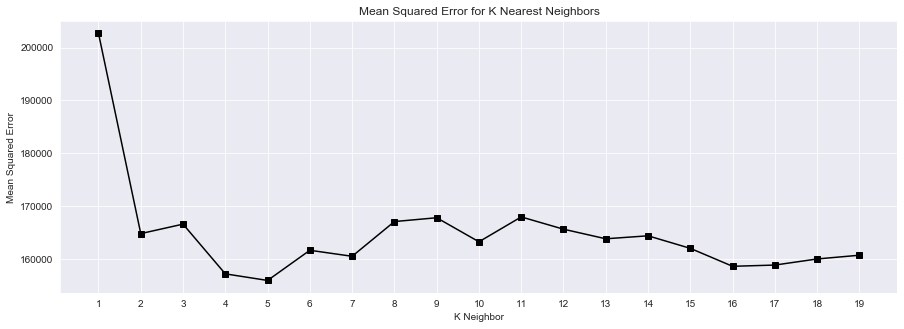

In [48]:
plt.figure(figsize=(15, 5))
ax = plt.subplot()
plt.plot(range(1, 20), knn_mse, marker='s', color='black')
ax.set_xticks(range(1, 20))
plt.xlabel('K Neighbor')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for K Nearest Neighbors')
plt.show()

It looks like five neighbors is the optimatal n_neighbors choice.

In [49]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

basic_knn_mae = mean_absolute_error(y_test, knn_y_pred)
print('Mean Absolute Error: {}'.format(basic_knn_mae))

basic_knn_mse = mean_squared_error(y_test, knn_y_pred)
print('Mean Square Error: {}'.format(basic_knn_mse))

basic_knn_rmse = np.sqrt(mean_squared_error(y_test, knn_y_pred))
print('Root Mean Square Error: {}'.format(basic_knn_rmse))

basic_knn_r_squared = knn.score(X_test, y_test)
print('R-squared: {}'.format(basic_knn_r_squared))

basic_knn_adj_r_squared = 1 - ((1-basic_knn_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-squared: {}'.format(basic_knn_adj_r_squared))

Mean Absolute Error: 203.93825213270142
Mean Square Error: 155931.4888100322
Root Mean Square Error: 394.88161366418694
R-squared: 0.25214864844709917
Adjusted R-squared: 0.24527580432024887


In [50]:
comparison_df = comparison_df.append([['Basic KNN', basic_knn_mae, basic_knn_mse, 
                                      basic_knn_rmse, basic_knn_r_squared, 
                                      basic_knn_adj_r_squared]])

It seems that neither the Linear Regression model, or the KNN model does a good job of fitting the data. Since the linear model only accounts for 22% of the data's variability it appears the features I used to fit the model don't do a great job explaining the data. 

I think that the lack of Synth Brands and Models is a large reason why these models severly underfit the data. When I try to incorporate synth Brands and Models there are just too many features to create a good fitting model. In order to incorporate both I would have to create dummy variables, which would create thousands of features.

I want to test building a model on the top ten synths dataset I have to see if I can create a better model with less features.

### Adding Top Ten Brands

In [51]:
top_ten = df['Brand'].value_counts()[:10].index
top_ten = df[df['Brand'].isin(top_ten)].reset_index(drop=True)

In [52]:
top_ten = pd.get_dummies(top_ten, columns=['Brand'])
top_ten.drop(['Description', 'Model'], axis=1, inplace=True)

In [53]:
X = top_ten.drop('Price', axis=1)
y = top_ten['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.3796502665395983

In [55]:
ttb_linear_y_pred = linear_model.predict(X_test)

ttb_linear_mae = mean_absolute_error(y_test, ttb_linear_y_pred)
print('Mean Absolute Error: {}'.format(ttb_linear_mae))

ttb_linear_mse = mean_squared_error(y_test, ttb_linear_y_pred)
print('Mean Square Error: {}'.format(ttb_linear_mse))

ttb_linear_rmse = np.sqrt(mean_squared_error(y_test, ttb_linear_y_pred))
print('Root Mean Square Error: {}'.format(ttb_linear_rmse))

ttb_linear_r_squared = linear_model.score(X_test, y_test)
print('R-Squared: {}'.format(ttb_linear_r_squared))

ttb_linear_adj_r_squared = 1 - ((1-ttb_linear_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: {}'.format(ttb_linear_adj_r_squared))

Mean Absolute Error: 170.96379435858898
Mean Square Error: 87258.94568583956
Root Mean Square Error: 295.39625198339866
R-Squared: 0.3796502665395983
Adjusted R-Squared: 0.3735893783391231


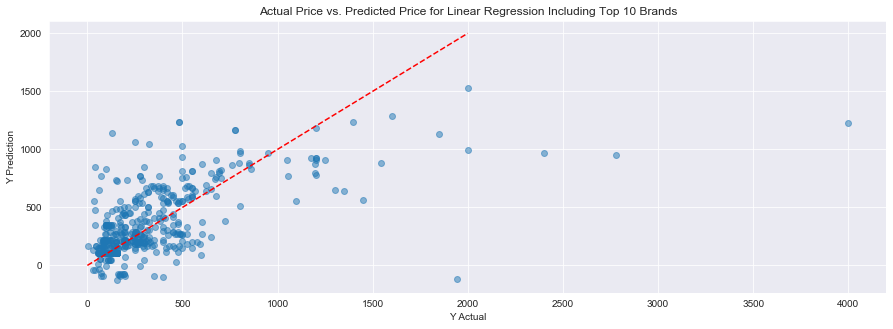

In [56]:
plt.figure(figsize=(15, 5))
plt.scatter(y_test, ttb_linear_y_pred, alpha=0.5)
plt.plot(range(2000), range(2000), color='red', ls='--')
plt.xlabel('Y Actual')
plt.ylabel('Y Prediction')
plt.title('Actual Price vs. Predicted Price for Linear Regression Including Top 10 Brands')
plt.show()

In [57]:
# Building an SM Model with X and Y to look at Adjusted R-squared

sm_model = sm.OLS(y, sm.add_constant(X))
sm_results = sm_model.fit()
sm_results.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     29.58
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          9.04e-134
Time:                        17:42:39   Log-Likelihood:                -11900.
No. Observations:                1628   AIC:                         2.386e+04
Df Residuals:                    1596   BIC:                         2.404e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          363.5834    151.004      2.408      0.016      67.396     659.770
n_keys                           9.2908      0.580     16.022      0.000       8.153      10.428
Condition_Brand New            329.5379    173.737      1.897      0.058     -11.239     670.315
Condition_Excellent            -64.3485    165.439     -0.389      0.697    -388.848     260.151
Condition_Fair                -281.1312    195.887     -1.435      0.151    -665.355     103.093
Condition_Good                -235.8943    174.244     -1.354      0.176    -577.665     105.876
Condition_Mint                 -62.6889    165.921     -0.378      0.706    -388.135     262.758
Condition_Non Functioning     -229.3683    233.438     -0.983      0.326    -687.245     228.508
Condition_Poor                -160.9475    403.056     -0.399      0.690    -951.522     629.627
Condition_Very Good           -111.6999    166.323     -0.672      0.502    -437.934     214.534
synth_types_Benches            -4.6e-13   9.28e-14     -4.954      0.000   -6.42e-13   -2.78e-13
synth_types_Cases             -488.5947    135.187     -3.614      0.000    -753.757    -223.432
synth_types_Controllers       -302.7103     46.695     -6.483      0.000    -394.299    -211.121
synth_types_Digital Pianos    -272.5086     72.607     -3.753      0.000    -414.923    -130.094
synth_types_Digital Synths    -243.1518     35.106     -6.926      0.000    -312.010    -174.294
synth_types_Electric Pianos   -292.3750    369.273     -0.792      0.429   -1016.687     431.937
synth_types_Eurorack           -13.4200     61.633     -0.218      0.828    -134.310     107.470
synth_types_Keyboard Parts    -415.0266    111.936     -3.708      0.000    -634.583    -195.470
synth_types_Modular Synths      30.7520     48.717      0.631      0.528     -64.804     126.308
synth_types_Organs            -390.4598    186.784     -2.090      0.037    -756.828     -24.091
synth_types_Pedals            -515.2681    130.338     -3.953      0.000    -770.920    -259.616
synth_types_Rackmount Synths     7.4274    111.045      0.067      0.947    -210.382     225.237
synth_types_Stands            -550.1308    185.193     -2.971      0.003    -913.377    -186.884
synth_types_Workstations       -62.3176     67.559     -0.922      0.356    -194.832      70.197
Brand_Arturia                  -73.6986     44.514     -1.656      0.098    -161.011      13.614
Brand_Behringer                -77.8311     43.600     -1.785      0.074    -163.350       7.688
Brand_Gator                   -101.1459    129.148     -0.783      0.434    -354.464     152.172
Brand_Intellijel               -96.1168     51.094     -1.881      0.060    -196.336       4.102
Brand_Korg                       3.3092     34.262      0.097      0.923    

In [58]:
comparison_df = comparison_df.append([['Top Ten Brands Linear', ttb_linear_mae, ttb_linear_mse, 
                                      ttb_linear_rmse, ttb_linear_r_squared, 
                                      ttb_linear_adj_r_squared]])

In [59]:
# Fitting the top ten brands dataset with a KNN model to see if it does a better job

knn_mse_ttb = []

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn_model = knn.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    w = mean_squared_error(y_test, y_pred)
    knn_mse_ttb.append(w)
    print (i, w)

1 76476.33861063395
2 63489.78453169734
3 68944.3071338105
4 65999.45587951176
5 69656.53077169735
6 71841.0833198875
7 73761.79226363674
8 73410.41273101354
9 74394.89078397334
10 72173.53723108384
11 71204.62384333856
12 73414.23970109351
13 75640.70203981681
14 77456.94152457638
15 81315.68648967416
16 84601.42665738353
17 84990.80448725454
18 83373.19859505794
19 84213.08667826759


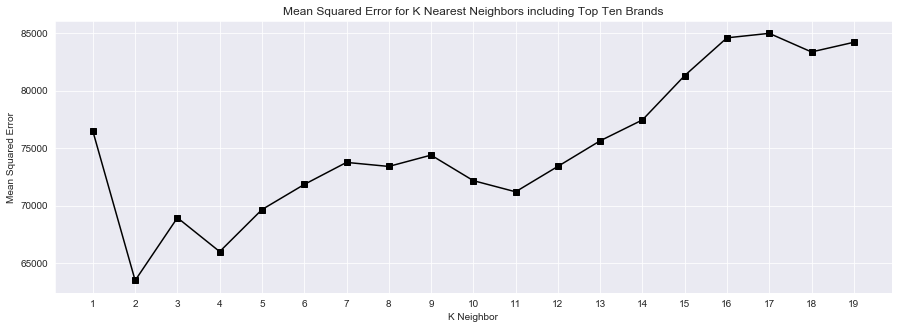

In [60]:
plt.figure(figsize=(15, 5))
ax = plt.subplot()
plt.plot(range(1, 20), knn_mse_ttb, marker='s', color='black')
ax.set_xticks(range(1, 20))
plt.xlabel('K Neighbor')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for K Nearest Neighbors including Top Ten Brands')
plt.show()

In [61]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
updated_knn_y_pred = knn.predict(X_test)

ttb_knn_mae = mean_absolute_error(y_test, updated_knn_y_pred)
print('Mean Absolute Error: {}'.format(ttb_knn_mae))

ttb_knn_mse = mean_squared_error(y_test, updated_knn_y_pred)
print('Mean Square Error: {}'.format(ttb_knn_mse))

ttb_knn_rmse = np.sqrt(mean_squared_error(y_test, updated_knn_y_pred))
print('Root Mean Square Error: {}'.format(ttb_knn_rmse))

ttb_knn_r_squared = knn.score(X_test, y_test)
print('R-squared: {}'.format(ttb_knn_r_squared))

ttb_knn_adj_r_squared = 1 - ((1-ttb_knn_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-squared: {}'.format(ttb_knn_adj_r_squared))

Mean Absolute Error: 146.47171779141104
Mean Square Error: 93713.79010388548
Root Mean Square Error: 306.1270816244219
R-squared: 0.3337608625043973
Adjusted R-squared: 0.32725162955185405


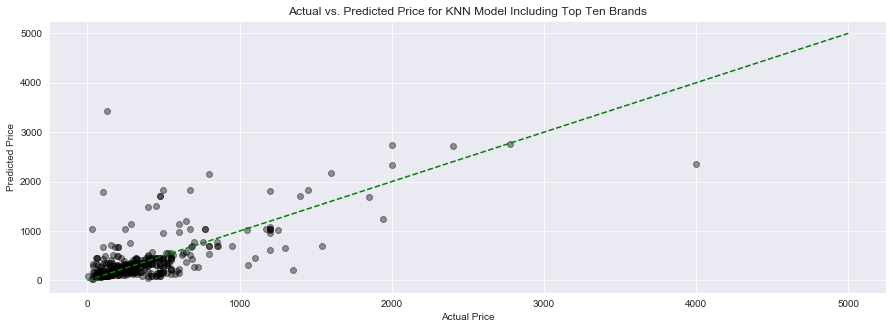

In [62]:
plt.figure(figsize=(15, 5))
plt.scatter(y_test, updated_knn_y_pred, color='black', alpha=0.4)
plt.plot(range(5000), range(5000), color='green', ls='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price for KNN Model Including Top Ten Brands')
plt.show()

In [63]:
comparison_df = comparison_df.append([['Top Ten Brands KNN', ttb_knn_mae, ttb_knn_mse, 
                                      ttb_knn_rmse, ttb_knn_r_squared, 
                                      ttb_knn_adj_r_squared]])

When incorporating the data from the top ten most sold brands both Linear Regression and KNN R-squared scores are higher, with the Adjusted R-Squared also being higher, which tells me that the addition of the top ten Brands adds to describing the variability of Price. Additionally both models do a better job at fitting the data, with a decrease in mean sqaured error, root mean squared error, and mean absolute error for both the Linear Regression, and KNN with the addition of the top ten brands.


In this case it appears the KNN model does a better job at predicting price than the Linear Regression model, however the errors are still extremely off in my opinion. With a mean absolute error of 124 dollars, and a root mean squared error of 272 dollars, for a lot of synths for sale this is too far off to warrant being used.

The R-sqaured is also low for both, with both having R-square's under 50%. 

It does appear that there is some multicollinearity in this model though. I can either fix this by removing the highly correlated variables, or look to fit another model to account for this.

## 4.3 PCA + Linear Regression
<a id='PCA'></a>

In [64]:
# First I will make dummy variables out of all the brands in the data set

brand_dummies = pd.get_dummies(df['Brand'], drop_first=True)
new_df = pd.concat([new_df, brand_dummies], axis=1)

In [65]:
from sklearn.decomposition import PCA

In [66]:
# Creating a new PCA object with the number of principal components equal to 2

pca_mse = []

for i in range(1, 50):
    pca = PCA(n_components=i)

    X = new_df.drop('Price', axis=1)
    y = new_df['Price']

    pca_X = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.3, random_state=101)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    linear_model.fit(X_train_scaled, y_train)
    pca_y_pred = linear_model.predict(X_test_scaled)
    
    pca_i_mse = mean_squared_error(y_test, pca_y_pred)
    
    pca_mse.append(pca_i_mse)
    
    print(i, pca_i_mse)
    

1 214503.67308227622
2 214124.8443367767
3 208523.48161231462
4 206823.05512410053
5 205592.1075569086
6 199351.39744417442
7 199440.49972969823
8 194087.27995402412
9 188516.34426833465
10 186352.50220521525
11 182604.62921189578
12 181945.07632283203
13 181967.43075779348
14 181302.08070010098
15 181558.74626069315
16 181521.65039501863
17 181832.69468963196
18 179820.22362308844
19 177153.75729394806
20 175584.4551072841
21 175364.08040728082
22 174197.60794339745
23 173612.8089858823
24 172974.7595918768
25 172397.37777113027
26 171632.2200951736
27 171599.249165366
28 171524.08987758777
29 171311.8090775304
30 171433.89874030306
31 171211.4826948734
32 171889.53590353677
33 171784.3910274445
34 171715.8733723349
35 168751.8595988218
36 168282.25679219235
37 177790.39134640424
38 177184.96971942033
39 174602.04233032197
40 190383.53997501428
41 183381.67169297943
42 178614.1333444591
43 175022.3768826883
44 174456.90266731635
45 173562.89880082817
46 174409.85077432374
47 172962.06

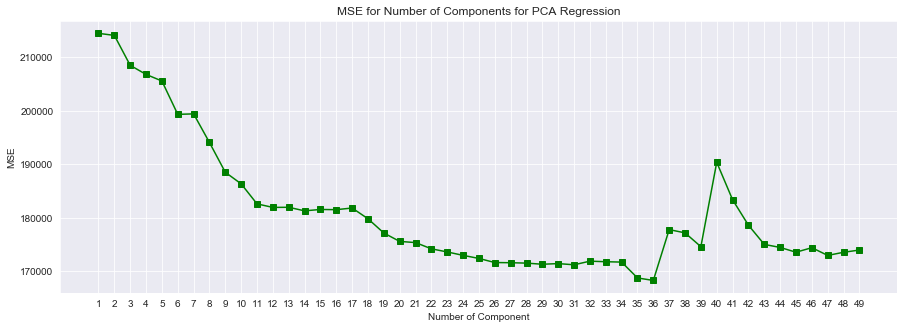

In [67]:
# Plotting the MSE's for number of components to view which model generates the smallest MSE

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(pca_mse) + 1), pca_mse, color='green', marker='s')
plt.xlabel('Number of Component')
plt.ylabel('MSE')
plt.title('MSE for Number of Components for PCA Regression')
plt.xticks(range(1, len(pca_mse) + 1))
plt.show()

In [68]:
# Fitting the model and getting the mean squared errors for this model


pca = PCA(n_components=35)

X = new_df.drop('Price', axis=1)
y = new_df['Price']

pca_X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.3, random_state=101)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
linear_model.fit(X_train_scaled, y_train)
pca_y_pred = linear_model.predict(X_test_scaled)

pca_linear_mae = mean_absolute_error(y_test, pca_y_pred)
print('Mean Absolute Error: {}'.format(round(pca_linear_mae, 2)))

pca_linear_mse = mean_squared_error(y_test, pca_y_pred)
print('Mean Squared Error: {}'.format(round(pca_linear_mse, 2)))

pca_linear_rmse = np.sqrt(mean_squared_error(y_test, pca_y_pred))
print('Root Mean Squared Error: {}'.format(pca_linear_rmse))

pca_linear_r_squared = linear_model.score(X_test_scaled, y_test)
print('R-Squared: {}'.format(pca_linear_r_squared))

pca_linear_adj_r_squared = 1 - ((1-pca_linear_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: {}'.format(pca_linear_r_squared))

Mean Absolute Error: 215.96
Mean Squared Error: 168814.56
Root Mean Squared Error: 410.87048551671785
R-Squared: 0.21440695799818088
Adjusted R-Squared: 0.21440695799818088


In [69]:
comparison_df = comparison_df.append([['PCA_Linear', pca_linear_mae, pca_linear_mse, 
                                      pca_linear_rmse, pca_linear_r_squared, 
                                      pca_linear_adj_r_squared]])

## 4.4 Stepwise
<a id='Step_Wise'></a>

### Linear Regression

In [70]:
# Building a function that will take a list of X, and y variables, and perform forward and backward propogation
# on a linear model in order to determine which independent variables are the best predictors of price.

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [71]:
# Using the stepwise function on the X and y variables, and printing the results.
results = stepwise_selection(X, y)
print('Resulting Features:')
print(results)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
<ipython-input-70-4941cf30d3ae>:33: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  best_feature = new_pval.argmin()


Add  Nord                           with p-value 4.65242e-60
Add  Steelphon                      with p-value 1.33127e-41
Add  n_keys_61                      with p-value 2.91698e-43
Add  n_keys_76                      with p-value 4.7129e-31
Add  Rhodes                         with p-value 3.61478e-32
Add  Oberheim                       with p-value 3.82175e-21
Add  n_keys_88                      with p-value 4.68832e-21
Add  Waldorf                        with p-value 8.37778e-21
Add  Moog                           with p-value 7.43042e-21
Add  Sequentix                      with p-value 1.93498e-21
Add  Dave Smith Instruments         with p-value 3.67806e-20
Add  Sequential Circuits            with p-value 8.34241e-20
Add  Teenage Engineering            with p-value 1.89471e-19
Add  Black Corporation              with p-value 8.55637e-19
Add  Roland                         with p-value 1.85424e-18
Add  Cwejman                        with p-value 1.06254e-17
Add  Elektron            

In [72]:
# Creating a new X variable with the predictors that were determined above, and creating a training group and
# a testing group
X = new_df[results]
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [73]:
# Fitting the new model, after performing Stepwise selection. Creating the model with Statsmodels to look at the 
# Summary table, in particular Adjusted R-Squared
sm_model = sm.OLS(y_train, sm.add_constant(X_train))
sm_results = sm_model.fit()
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     58.11
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:49:19   Log-Likelihood:                -17675.
No. Observations:                2459   AIC:                         3.547e+04
Df Residuals:                    2398   BIC:                         3.583e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         421.5322     19.750     21.343      0.000     382.803     460.262
Nord                         1479.9351     76.244     19.411      0.000    1330.425    1629.446
Steelphon                    4377.4678    324.896     13.473      0.000    3740.361    5014.575
n_keys_61                     505.1943     36.336     13.903      0.000     433.941     576.447
n_keys_76                    1173.8637    120.382      9.751      0.000     937.800    1409.927
Rhodes                       4019.9620    297.503     13.512      0.000    3436.572    4603.352
Oberheim                     1641.9921    134.584     12.200      0.000    1378.079    1905.905
n_keys_88                     779.7682     68.897     11.318      0.000     644.664     914.872
Waldorf                       944.9602     89.275     10.585      0.000     769.897    1120.024
Moog                          259.1305     38.337      6.759      0.000     183.953     334.308
Sequentix                    1965.2109    163.044     12.053      0.000    1645.488    2284.933
Dave Smith Instruments        486.1594     81.677      5.952      0.000     325.994     646.324
Sequential Circuits           982.6459    125.138      7.852      0.000     737.255    1228.037
Teenage Engineering           422.5718     49.775      8.490      0.000     324.965     520.179
Black Corporation            2478.4678    324.896      7.628      0.000    1841.361    3115.575
Roland                        210.9750     30.545      6.907      0.000     151.078     270.872
Cwejman                      2289.2306    229.585      9.971      0.000    1839.025    2739.437
Elektron                      270.3703     51.892      5.210      0.000     168.612     372.129
synth_types_Cases            -488.5798     43.598    -11.206      0.000    -574.073    -403.086
Ciat-Lonbarde                1262.8735    187.902      6.721      0.000     894.407    1631.340
Mellotron                    1293.9605    231.597      5.587      0.000     839.810    1748.111
synth_types_Controllers      -300.3201     27.323    -10.991      0.000    -353.900    -246.740
n_keys_44                     435.1101    134.919      3.225      0.001     170.541     699.680
Access                       1112.0982    146.690      7.581      0.000     824.447    1399.750
Buchla                       1793.3606    229.585      7.811      0.000    1343.155    2243.567
Wurlitzer                    2066.7255    298.327      6.928      0.000    1481.720    2651.731
Casio                        -406.5148     57.393     -7.083      0.000    -519.060    -293.969
n_keys_49                     257.1359     40.595      6.334      0.000     177.532     336.740
Fender                       2069.9620    375.622      5.511      0.000    1333.385    2806.539
M-Audio    

In [74]:
# Creating a variable for all the predicted Price amounts using the model generated above. Testing the Model's
# Accuracy by measuring Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

updated_linear_reg_2_y_pred = sm_results.predict(sm.add_constant(X_test))

stepwise_linear_mae  = mean_absolute_error(y_test, updated_linear_reg_2_y_pred)
print('Mean Absolute Error: {}'.format(round(stepwise_linear_mae, 2)))

stepwise_linear_mse = mean_squared_error(y_test, updated_linear_reg_2_y_pred)
print('Mean Squared Error: {}'.format(round(stepwise_linear_mse, 2)))

stepwise_linear_rmse = np.sqrt(mean_squared_error(y_test, updated_linear_reg_2_y_pred))
print('Root Mean Squared Error: {}'.format(stepwise_linear_rmse))

stepwise_linear_r_squared = sm_results.rsquared
print('R-Squared: {}'.format(stepwise_linear_r_squared))

stepwise_linear_adj_r_squared = sm_results.rsquared_adj
print('Adjusted R-Squared: {}'.format(stepwise_linear_adj_r_squared))

Mean Absolute Error: 179.6
Mean Squared Error: 112390.95
Root Mean Squared Error: 335.2476008217954
R-Squared: 0.5924936248133185
Adjusted R-Squared: 0.5822974686368377


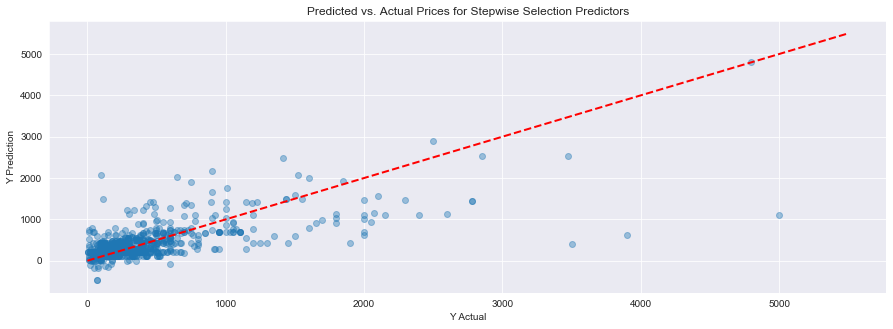

In [75]:
# Plotting the Actual Prices vs. the new Model's Predicted Prices.
plt.figure(figsize=(15, 5))
plt.scatter(y_test, updated_linear_reg_2_y_pred, alpha=0.4)
plt.plot(range(5500), range(5500), color='red', lw=2, ls='--') # Plotting a line to show what the perfect model would look like
plt.xlabel('Y Actual')
plt.ylabel('Y Prediction')
plt.title('Predicted vs. Actual Prices for Stepwise Selection Predictors')
plt.show()

In [76]:
comparison_df = comparison_df.append([['Stepwise Linear', stepwise_linear_mae, stepwise_linear_mse, 
                                      stepwise_linear_rmse, stepwise_linear_r_squared, 
                                      stepwise_linear_adj_r_squared]])

The stepwise linear regression uses forward and backward propogation to determine which independent variaables are significant, and cut out the remaining noise. It does a better job at predicting synth price than any other regression analysis that's been run so far, however the mean absolute error, and root mean squared error are still too high for my liking at 179.60, and 335.25 dollars respectiviely. That's just too far off in terms of pricing something to me.

I noticed that there might be some multicollinearity in this new model, so I will investigate that further, and try to remove any variables with high multicollinearity.

In [77]:
# Calculating the Variance Inflation Factor to determine if there's collinnearity in the new predictors, and if so
# to determine which predictors have multicollinearity and need to be removed.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns

In [78]:
vif.sort_values('VIF', ascending=False)

,VIF,Features
43,1.726852,synth_types_Electric Pianos
30,1.456448,Condition_Brand New
42,1.272593,synth_types_Workstations
24,1.230366,Wurlitzer
12,1.221814,Teenage Engineering
...,...,...
17,0.567493,synth_types_Cases
20,0.515692,synth_types_Controllers
37,0.240451,synth_types_Modular Synths
40,0.117569,synth_types_Digital Synths


From the Dataframe above I can see that there isn't any multicollinearity between these predictors. I want to attempt a KNN Regressor model with these new predictors to see if I can get an improvement from this linear regression

### KNN Regressor

In [79]:
knn_sw_mse = []

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn_model = knn.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    w = mean_squared_error(y_test, y_pred)
    knn_sw_mse.append(w)
    print(i, w)

1 96473.51315175355
2 113921.0728098815
3 120163.95809120589
4 138608.48024614927
5 138077.265207818
6 137848.62317724063
7 135658.29372284166
8 135783.17738863005
9 135847.17468345328
10 141906.68824846257
11 142390.19694650502
12 142376.51551417258
13 143079.47235527862
14 142564.18238938675
15 143129.73314817567
16 144606.91422442498
17 146005.53979024844
18 145432.63726434877
19 147030.51310897403


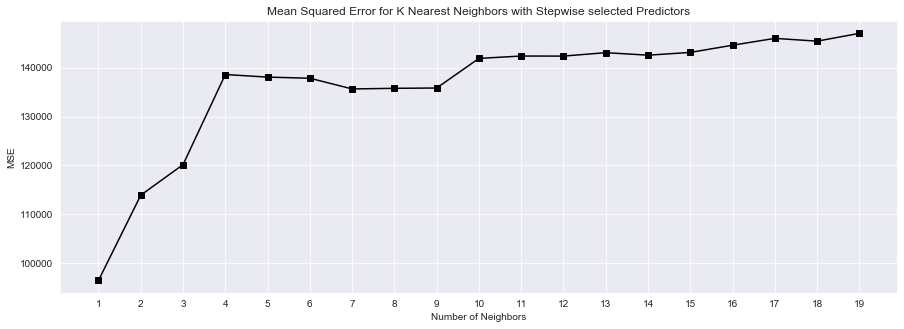

In [80]:
plt.figure(figsize=(15, 5))
ax = plt.subplot()
plt.plot(range(1, 20), knn_sw_mse, marker='s', color='black')
ax.set_xticks(range(1, 20))
plt.xlabel('Number of Neighbors')
plt.ylabel('MSE')
plt.title('Mean Squared Error for K Nearest Neighbors with Stepwise selected Predictors')
plt.show()

In [81]:
knn = KNeighborsRegressor(n_neighbors=1)
knn_model = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

stepwise_knn_mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {}'.format(round(stepwise_knn_mae, 2)))

stepwise_knn_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {}'.format(round(stepwise_knn_mse, 2)))

stepwise_knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(stepwise_knn_rmse))

stepwise_knn_r_squared = knn_model.score(X_test, y_test)
print('R-Squared: {}'.format(stepwise_knn_r_squared))

stepwise_knn_adj_r_squared = 1 - ((1-stepwise_knn_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: {}'.format(stepwise_knn_adj_r_squared))

Mean Absolute Error: 180.05
Mean Squared Error: 139449.12
Root Mean Squared Error: 373.4288681287818
R-Squared: 0.3510615392758919
Adjusted R-Squared: 0.3390232605841983


In [82]:
comparison_df = comparison_df.append([['Stepwise KNN', stepwise_knn_mae, stepwise_knn_mse, 
                                      stepwise_knn_rmse, stepwise_knn_r_squared, 
                                      stepwise_knn_adj_r_squared]])

## 4.5 Ridge Regression
<a id='Ridge'></a>

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [84]:
ridge = Ridge()

X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_scaled = scaler.fit_transform(X)

# Creating a number of parameters of alpha to test with the Lasso object to determine which is the best
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Using GridSearch to find the optimal parameter of alpha for the ridge model with 5-Fold Cross Validation
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_scaled, y)

# Printing the best alpha as per the GridSearchCV
print(ridge_regressor.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(ridge_regressor.best_score_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.96651e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78746e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75416e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.53223e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Pyth

{'alpha': 20}
-129048.66831890187


In [85]:
# Creating a new ridge variable with the optimal alpha amount listed in the Ridge object
ridge = Ridge(alpha=20)

# Creating a train test split for this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge.fit(X_train_scaled, y_train)

ridge_y_pred = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
print('Mean Absolute Error: {}'.format(round(ridge_mae, 2)))

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print('Mean Squared Error: {}'.format(round(ridge_mse, 2)))

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
print('Root Mean Squared Error: {}'.format(ridge_rmse))

ridge_r_sqaured = ridge.score(X_test_scaled, y_test)
print('R-Squared: {}'.format(ridge_r_sqaured))

ridge_adj_r_squared = 1 - ((1-ridge_r_sqaured) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: {}'.format(ridge_adj_r_squared))

Mean Absolute Error: 177.22
Mean Squared Error: 110881.23
Root Mean Squared Error: 332.9883342751647
R-Squared: 0.48400466459768654
Adjusted R-Squared: 0.4265630586325966


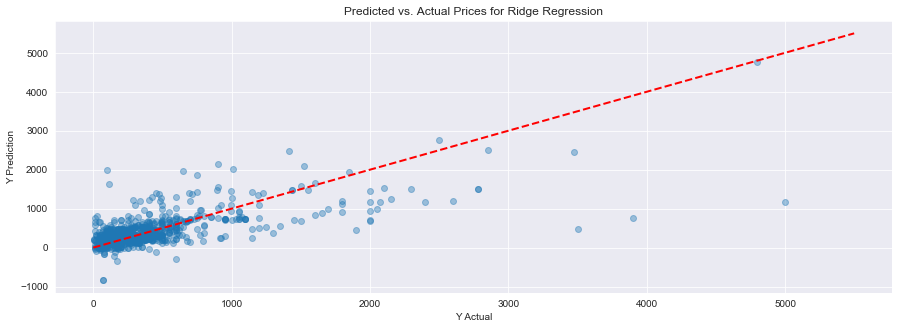

In [86]:
# Plotting the Actual Prices vs. the optimal Ridge Regression Model's Predicted Prices.
plt.figure(figsize=(15, 5))
plt.scatter(y_test, ridge_y_pred, alpha=0.4)
plt.plot(range(5500), range(5500), color='red', lw=2, ls='--') # Plotting a line to show what the perfect model would look like
plt.xlabel('Y Actual')
plt.ylabel('Y Prediction')
plt.title('Predicted vs. Actual Prices for Ridge Regression')
plt.show()


In [87]:
comparison_df = comparison_df.append([['Ridge Linear', ridge_mae, ridge_mse, 
                                      ridge_rmse, ridge_r_sqaured, 
                                      ridge_adj_r_squared]])

## 4.6 Lasso Regression
<a id='Lasso'></a>

In [88]:
from sklearn.linear_model import Lasso

In [89]:
lasso = Lasso()

X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_scaled = scaler.fit_transform(X)

# Creating a number of parameters of alpha to test with the Lasso object to determine which is the best
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Using GridSearch to find the optimal parameter of alpha for the lasso model with 5-Fold Cross Validation
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_scaled, y)

# Printing the best alpha as per the GridSearchCV
print(lasso_regressor.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(lasso_regressor.best_score_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113555960.64549293, tolerance: 65233.93848116634
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118305777.47731729, tolerance: 65350.51447748752
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146517237.72593293, tolerance: 72755.65261565891
  model = cd_fast.enet_coordinate_descent(
/

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4268660.883437306, tolerance: 65233.93848116634
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7780531.601308316, tolerance: 65350.51447748752
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45789820.21109097, tolerance: 72755.65261565891
  model = cd_fast.enet_coordinate_descent(
/Lib

{'alpha': 1}
-128610.37518479303


In [90]:
# Creating a new ridge variable with the optimal alpha amount listed in the Ridge object
lasso = Lasso(alpha=1)

lasso.fit(X_train_scaled, y_train)

lasso_y_pred = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print('Mean Absolute Error: {}'.format(round(lasso_mae, 2)))

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print('Mean Squared Error: {}'.format(round(lasso_mse, 2)))

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
print('Root Mean Squared Error: {}'.format(lasso_rmse))

lasso_r_squared = lasso.score(X_test_scaled, y_test)
print('R-Squared: {}'.format(lasso_r_squared))

lasso_adj_r_squared = 1 - ((1-lasso_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: {}'.format(lasso_adj_r_squared))

Mean Absolute Error: 175.04
Mean Squared Error: 110561.52
Root Mean Squared Error: 332.50792506621605
R-Squared: 0.48549246502884735
Adjusted R-Squared: 0.42821648390618905


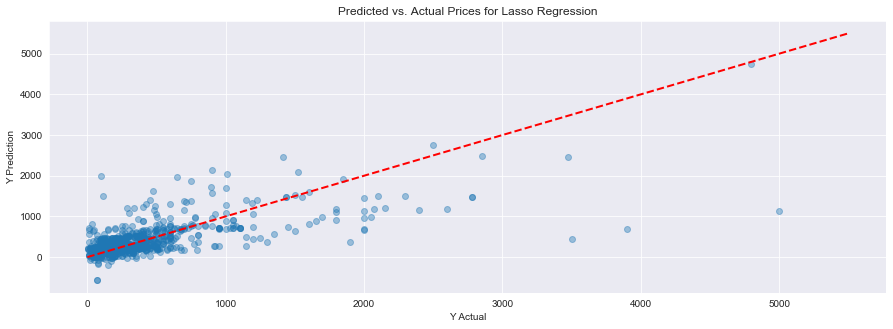

In [91]:
# Plotting the Actual Prices vs. the optimal Lasso Regression Model's Predicted Prices.
plt.figure(figsize=(15, 5))
plt.scatter(y_test, lasso_y_pred, alpha=0.4)
plt.plot(range(5500), range(5500), color='red', lw=2, ls='--') # Plotting a line to show what the perfect model would look like
plt.xlabel('Y Actual')
plt.ylabel('Y Prediction')
plt.title('Predicted vs. Actual Prices for Lasso Regression')
plt.show()

In [92]:
comparison_df = comparison_df.append([['Lasso Linear', lasso_mae, lasso_mse, 
                                      lasso_rmse, lasso_r_squared, 
                                      lasso_adj_r_squared]])

In [93]:
comparison_df.rename(columns={0: 'Model', 1: 'MAE', 2: 'MSE', 3: 'RMSE',
                             4: 'r_squared', 5: 'adj_r_squared'}, inplace=True)

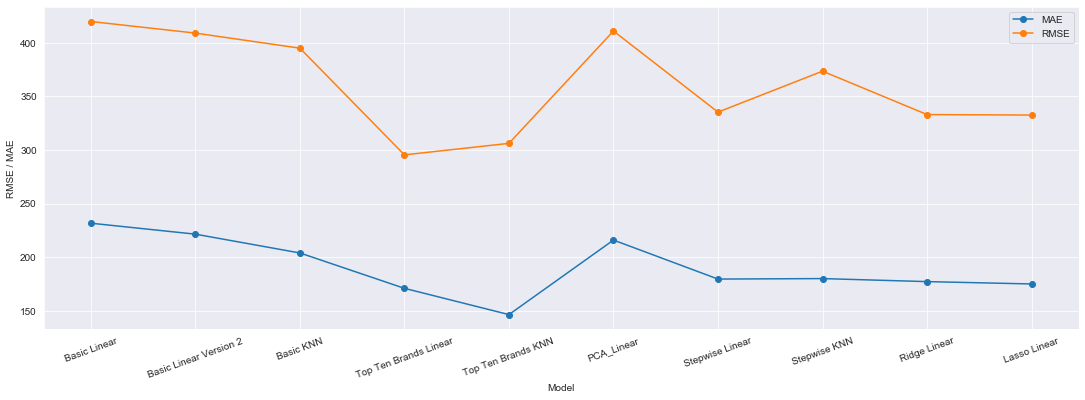

In [94]:
plt.figure(figsize=(15, 5))
ax = plt.subplot()

for column in comparison_df.columns[1:-2]:
    if column != 'MSE':
        x = range(len(comparison_df))
        plt.plot(x, comparison_df[column], label=column, marker='o')
        plt.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'].unique(), rotation=20)
plt.legend()
plt.xlabel('Model')
plt.ylabel('RMSE / MAE')
plt.show()

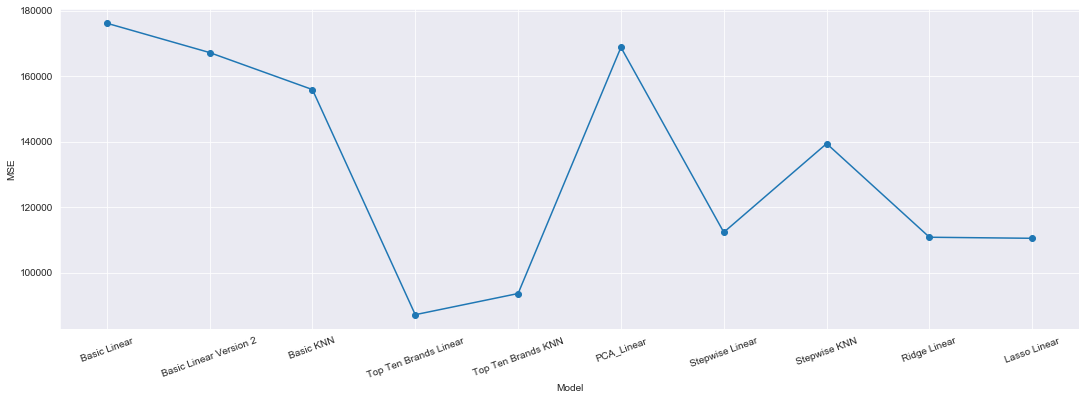

In [95]:
plt.figure(figsize=(15, 5))
ax = plt.subplot()

plt.plot(x, comparison_df['MSE'], marker='o')
plt.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'].unique(), rotation=20)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()

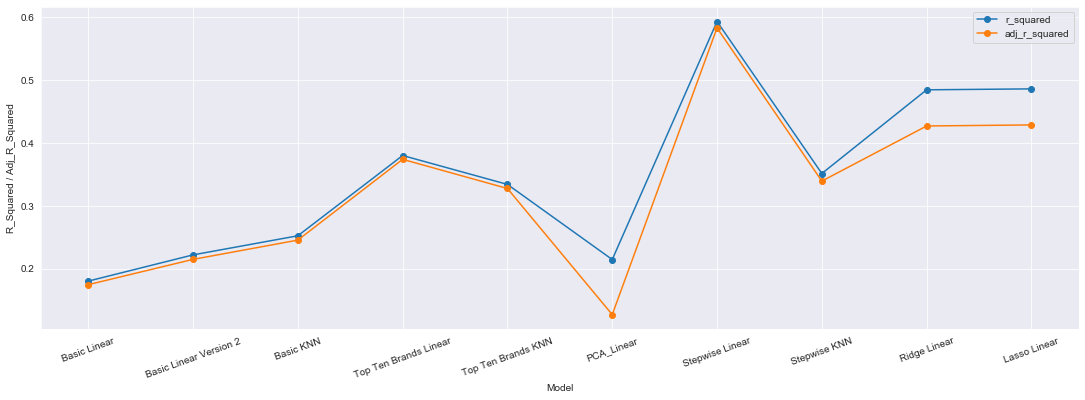

In [96]:
plt.figure(figsize=(15, 5))
ax = plt.subplot()

for column in comparison_df.columns[-2:]:
    x = range(len(comparison_df))
    plt.plot(x, comparison_df[column], label=column, marker='o')
    plt.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'].unique(), rotation=20)
plt.legend()
plt.xlabel('Model')
plt.ylabel('R_Squared / Adj_R_Squared')
plt.show()

## 4.7 Adding Synth Model Type As Dummy Variable
<a id='synth_model_type'></a>

In [97]:
synth_model = pd.get_dummies(df['Model'])

new_df = pd.concat([new_df, synth_model], axis=1)

### 4.7.1 Linear Model
<a id='linear_model_w_model'></a>

In [98]:
X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

full_linear_model = sm.OLS(y_train, sm.add_constant(X_train))
results = full_linear_model.fit()

results.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid v

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     154.9
Date:                Tue, 07 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:50:33   Log-Likelihood:                -11959.
No. Observations:                2459   AIC:                         2.698e+04
Df Residuals:                     928   BIC:                         3.587e+04
Df Model:                        1530                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================================
                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                251.1000     66.990      3.748      0.000     119.630     382.570
Condition_Brand New                                                                                                    3.3526     36.059      0.093      0.926     -67.415      74.120
Condition_Excellent                                                                                                  -35.7682     35.177     -1.017      0.310    -104.804      33.267
Condition_Fair                                                                                                      -177.2240     52.601     -3.369      0.001    -280.455     -73.993
Condition_Good                                                                                                       -24.7809     35.575     -0.697      0.486     -94.597      45.035
Condition_Mint                                                                                                       -30.5596     35.192     -0.868      0.385     -99.624      38.505
Condition_Non Functioning                                                                                            -65.3077     61.941     -1.054      0.292    -186.867      56.252
Condition_Poor                                                                                                         5.4888     34.254      0.160      0.873     -61.736      72.713
Condition_Very Good                                                                                                  -50.0557     35.369     -1.415      0.157    -119.469      19.357
synth_types_Benches                                                                                                  -87.2834     31.444     -2.776      0.006    -148.993     -25.574
synth_types_Cases                                                                                                   -245.3669     40.324     -6.085      0.000    -324.503    -166.231
synth_types_Controllers                                                                                              622.4142    119.666      5.201      0.000     387.566     857.263
synth_types_Digital Pianos                                                                                           516.4763    116.843      4.420      0.000     287.169     745.784
synth_types_Digital Synths                                                                                           616.4976    105.852      5.824      0.

In [99]:
y_pred = results.predict(sm.add_constant(X_test))

full_linear_mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %0.2f' % (full_linear_mae))

full_linear_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: %0.2f' % (full_linear_mse))

full_linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % (full_linear_rmse))

full_linear_r_squared = results.rsquared
print('R-Squared: %0.3f' % (full_linear_r_squared))

full_linear_adj_r_squared = (1 - (1-full_linear_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: %0.2f' % (full_linear_adj_r_squared))

Mean Absolute Error: 120.83
Mean Squared Error: 96306.17
Root Mean Squared Error: 310.33
R-Squared: 0.996
Adjusted R-Squared: 0.99


### 4.7.2 KNN Model
<a id='knn_model_w_model'></a>

In [100]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

full_knn_mse = []

for i in range(1, 20):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    full_knn_mse.append(mse)
    print(i, mse)
    

1 119807.49332521328
2 136786.8491298815
3 155402.90946043178
4 168114.26112560427
5 177018.7821068474
6 182911.68884298054
7 188243.7314807293
8 192813.72718867892
9 197189.8165817951
10 200679.55266314503
11 203389.57149937798
12 206143.06762890468
13 208443.98375760115
14 210332.79049403814
15 211994.06573745
16 213730.76166306614
17 215251.46105148166
18 216869.8194808975
19 218642.75617172994


In [101]:
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

full_knn_mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %0.2f' % (full_knn_mae))

full_knn_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: %0.2f' % (full_knn_mse))

full_knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % (full_knn_rmse))

full_knn_r_squared = knn_model.score(X_test_scaled, y_test)
print('R-Squared: %0.2f' % (full_knn_r_squared))

full_knn_adj_r_squared = (1 - (1-full_knn_r_squared) * len(new_df) / (len(new_df) - len(X.columns) - 1))
print('Adjusted R-Squared: %0.2f' % (full_knn_adj_r_squared))

Mean Absolute Error: 136.59
Mean Squared Error: 119807.49
Root Mean Squared Error: 346.13
R-Squared: 0.44
Adjusted R-Squared: -0.56


### 4.7.3 PCA
<a id='PCA_Full'></a>

#### 4.7.3.1 Linear PCA

In [119]:
pca = PCA(n_components=0.95)

pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)
    
linear_model.fit(pca_X_train, y_train)
y_pred = linear_model.predict(pca_X_test)

full_linear_pca_mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %0.2f' % (full_linear_pca_mae))

full_linear_pca_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: %0.2f' % (full_linear_pca_mse))

full_linear_pca_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %0.2f' % (full_linear_pca_rmse))

full_linear_pca_r_squared = linear_model.score(pca_X_test, y_test)
print('R-Squared: %0.2f' % (full_linear_pca_r_squared))

full_linear_pca_adj_r_squared = 1 - ((1-full_linear_pca_r_squared) * len(new_df-1) / (len(new_df) - 
                                                                                      pca_X_train.shape[1] - 1))
print('Adjusted R-Squared: %0.2f' % (full_linear_pca_adj_r_squared))

Mean Absolute Error: 130.49
Mean Squared Error: 92625.97
Root Mean Squared Error: 304.35
R-Squared: 0.57
Adjusted R-Squared: 0.28


#### 4.7.3.2 KNN PCA

In [103]:
pca = PCA(n_components=0.95)

pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

knn_model = KNeighborsRegressor()
n_neighbors = {'n_neighbors': list(range(1, 20))}
knn_ = GridSearchCV(knn_model, n_neighbors, scoring='neg_mean_squared_error', cv=5)

knn_.fit(pca_X_train, y_train)

# Printing the best alpha as per the GridSearchCV
print(knn_.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(knn_.best_score_)

{'n_neighbors': 1}
-181138.76516141806


In [121]:
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(pca_X_train, y_train)

y_pred = knn_model.predict(pca_X_test)

full_knn_pca_mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: %0.2f' % (full_knn_pca_mae))

full_knn_pca_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: %0.2f' % (full_knn_pca_mse))

full_knn_pca_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean Squared Error: %0.2f' % (full_knn_pca_rmse))

full_knn_r_squared = knn_model.score(pca_X_test, y_test)
print('R-Squared: %0.3f' % (full_knn_r_squared))

full_knn_adj_r_squared = 1 - ((1-full_knn_r_squared) * len(new_df-1) / (len(new_df) - pca_X_train.shape[1] - 1))
print('Adjusted R-Squared: %0.3f' % (full_knn_adj_r_squared))

Mean Absolute Error: 132.11
Mean Squared Error: 114317.40
Mean Squared Error: 338.11
R-Squared: 0.468
Adjusted R-Squared: 0.109


### 4.7.4 Full Ridge
<a id='full_ridge'></a>

In [105]:
ridge = Ridge()

X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_scaled = scaler.fit_transform(X)

# Creating a number of parameters of alpha to test with the Lasso object to determine which is the best
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Using GridSearch to find the optimal parameter of alpha for the ridge model with 5-Fold Cross Validation
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_scaled, y)

# Printing the best alpha as per the GridSearchCV
print(ridge_regressor.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(ridge_regressor.best_score_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00283e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.44811e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.95031e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


{'alpha': 20}
-99547.95010926005


In [127]:
ridge = Ridge(alpha=20)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

ridge.fit(X_train, y_train)

ridge_y_pred = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
print('Mean Absolute Error: {}'.format(round(ridge_mae, 2)))

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print('Mean Squared Error: {}'.format(round(ridge_mse, 2)))

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
print('Root Mean Squared Error: {}'.format(ridge_rmse))

ridge_r_sqaured = ridge.score(X_test, y_test)
print('R-Squared: {}'.format(ridge_r_sqaured))

ridge_adj_r_squared = 1 - ((1-ridge_r_sqaured) * len(new_df-1) / (len(new_df) - X_train.shape[1] - 1))
print('Adjusted R-Squared: {}'.format(ridge_adj_r_squared))

Mean Absolute Error: 130.98
Mean Squared Error: 94151.93
Root Mean Squared Error: 306.84185754779685
R-Squared: 0.5771483201423317
Adjusted R-Squared: -0.18398470360147123


### 4.7.5 Full Lasso
<a id='full_lasso'></a>

In [107]:
lasso = Lasso()

lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Using GridSearch to find the optimal parameter of alpha for the lasso model with 5-Fold Cross Validation
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_scaled, y)

# Printing the best alpha as per the GridSearchCV
print(lasso_regressor.best_params_)

# Printing the best neg MSE score per the GridSearch CV
print(lasso_regressor.best_score_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1227411.996592066, tolerance: 65233.93848116634
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1450724.7903719137, tolerance: 65350.51447748752
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198534.584710429, tolerance: 72755.65261565891
  model = cd_fast.enet_coordinate_descent(
/Li

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542743.2370697261, tolerance: 65233.93848116634
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438379.45754394354, tolerance: 65350.51447748752
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575818.8349707553, tolerance: 72755.65261565891
  model = cd_fast.enet_coordinate_descent(
/Li

{'alpha': 0.01}
-95598.65989097542


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 859041.7241020405, tolerance: 84601.11884740765
  model = cd_fast.enet_coordinate_descent(


In [108]:
lasso = Lasso(alpha=0.01)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

lasso.fit(X_train, y_train)

lasso_y_pred = lasso.predict(X_test)

lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print('Mean Absolute Error: {}'.format(round(lasso_mae, 2)))

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print('Mean Squared Error: {}'.format(round(lasso_mse, 2)))

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
print('Root Mean Squared Error: {}'.format(lasso_rmse))

lasso_r_sqaured = lasso.score(X_test, y_test)
print('R-Squared: {}'.format(lasso_r_sqaured))

lasso_adj_r_squared = (1 - ((1-full_linear_pca_r_squared) * len(new_df - 1) / (len(new_df) - len(X.columns) - 1)))
print('Adjusted R-Squared: {}'.format(lasso_adj_r_squared))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679639.8863190627, tolerance: 61886.60044241437
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error: 110.31
Mean Squared Error: 103607.13
Root Mean Squared Error: 321.88061781977797
R-Squared: 0.5178553076617545
Adjusted R-Squared: -0.20692018139667678


## Deep Learning

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
model = Sequential([Dense(units=842, activation='relu'),
                   Dense(units=421, activation='relu'),
                   Dense(units=210, activation='relu'),
                   Dense(units=105, activation='relu'),
                   Dense(units=50, activation='relu'),
                   Dense(units=25, activation='relu'),
                   Dense(units=10, activation='relu')])
model.compile(optimizer='adam', loss='mse')

In [111]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [112]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stop])

Epoch 1/500
77/77 [==============================] - 2s 24ms/step - loss: 294913.4688 - val_loss: 195042.3281
Epoch 2/500
77/77 [==============================] - 2s 20ms/step - loss: 189822.6875 - val_loss: 161231.9375
Epoch 3/500
77/77 [==============================] - 2s 20ms/step - loss: 140180.9844 - val_loss: 151641.2812
Epoch 4/500
77/77 [==============================] - 2s 20ms/step - loss: 108415.5234 - val_loss: 146053.3125
Epoch 5/500
77/77 [==============================] - 2s 20ms/step - loss: 95160.0625 - val_loss: 139986.9375
Epoch 6/500
77/77 [==============================] - 2s 21ms/step - loss: 88477.1250 - val_loss: 140855.3281
Epoch 7/500
77/77 [==============================] - 2s 22ms/step - loss: 87454.4609 - val_loss: 142724.7812
Epoch 8/500
77/77 [==============================] - 2s 21ms/step - loss: 83876.0625 - val_loss: 136129.8125
Epoch 9/500
77/77 [==============================] - 2s 20ms/step - loss: 82040.8828 - val_loss: 161299.0469
Epoch 10/500
77

In [113]:
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

9/9 [==============================] - 0s 11ms/step - loss: 138718.9688
test loss, test acc: 138718.96875
